In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import math
torch.manual_seed(42)

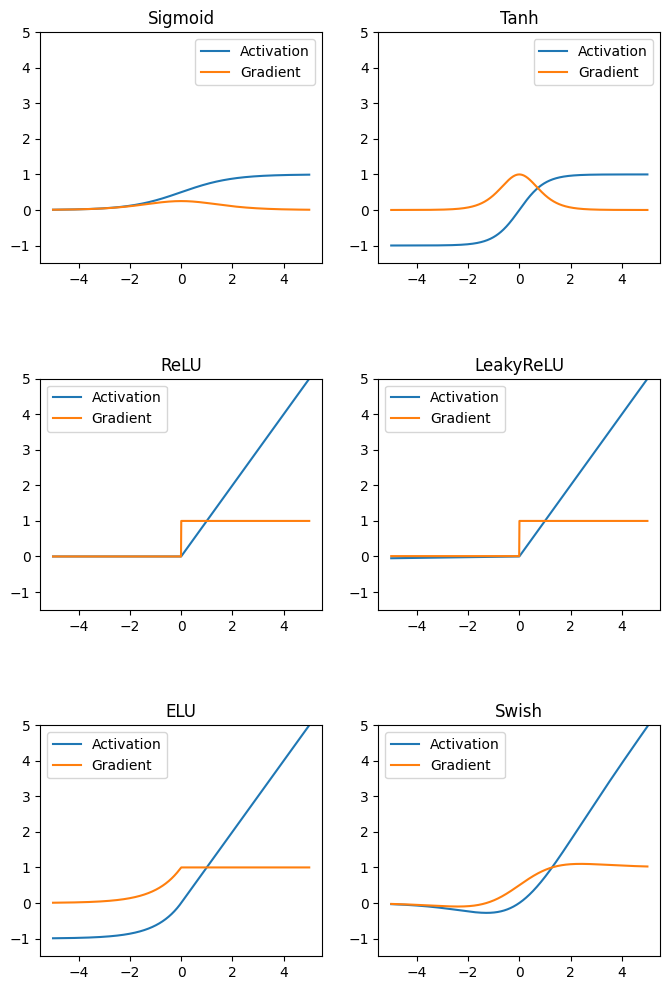

In [3]:
torch.manual_seed(42)
class Sigmoid(nn.Module):
    def __init__(self):
        super(Sigmoid, self).__init__()
        
    def forward(self, x):
        return 1 / (1 + torch.exp(-x))
    
class Tanh(nn.Module):
    def __init__(self):
        super(Tanh, self).__init__()
        
    def forward(self, x):
        return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))
    
class ReLU(nn.Module):
    def __init__(self):
        super(ReLU, self).__init__()
        
    def forward(self, x):
        return torch.max(x, torch.zeros_like(x))
    
class LeakyReLU(nn.Module):
    def __init__(self, alpha=0.01):
        super(LeakyReLU, self).__init__()
        self.alpha = alpha
        
    def forward(self, x):
        return torch.where(x > 0, x, self.alpha * x)
    
class ELU(nn.Module):
    def __init__(self, alpha=1.0):
        super(ELU, self).__init__()
        self.alpha = alpha
        
    def forward(self, x):
        return torch.where(x > 0, x, self.alpha * (torch.exp(x) - 1))
    
class Swish(nn.Module):
    def __init__(self):
        super(Swish, self).__init__()
        
    def forward(self, x):
        return x * torch.sigmoid(x)
    

activations = {"sigmoid": Sigmoid, "tanh": Tanh, "relu": ReLU, "leaky_relu": LeakyReLU, "elu": ELU, "swish": Swish}

def get_grads(activation, x):
    x = x.clone().requires_grad_()
    #activation.zero_grad()
    y = activation(x)
    y.sum().backward()
    return x.grad

def visualize_grads(activation, ax, x):
    y = activation(x)
    dy_dx = get_grads(activation, x)
    ax.plot(x, y, label="Activation")
    ax.plot(x, dy_dx, label="Gradient")
    ax.set_title(activation.__class__.__name__)
    ax.legend()
    ax.set_ylim(-1.5, x.max())

actfn = [actfn() for actfn in activations.values()]
x = torch.linspace(-5, 5, 1000)

rows = math.ceil(len(activations) / 2)
fig, ax = plt.subplots(rows, 2, figsize=(8, 4 * rows))

for i, act_fn in enumerate(actfn):
    visualize_grads(act_fn, ax[i//2, i%2], x)

fig.subplots_adjust(hspace=0.5)
plt.show()

ReLU is a piecewise linear function. A piecewise linear function is a function that is defined by multiple linear segments, each applying to a specific interval of the input variable. Rather than having a single continuous slope, a piecewise linear function 

eg f(x) = -x, x<0
        
        = x, x>=0

Tax calculation: A tax rate that changes at certain income thresholds can be modeled with a piecewise linear function, where each segment represents a different tax bracket with its own linear calculation.
    

References

Optimization and Initialization --> https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial4/Optimization_and_Initialization.html
